In [1]:
import os
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [4]:
dataset = 'lipo' # freesolv / esol / vd / lipo
save_dir = r'..\results_figure'

# MSE & MSE for Test dataset

In [68]:
# MSE
df_test_MSE = pd.read_csv(r'..\results_datasets\result_test_' + dataset + '_mse' + '.csv')
print(df_test_MSE.shape[1])

# MAE
df_test_MAE = pd.read_csv(r'..\results_datasets\result_test_' + dataset + '_mae' + '.csv')
print(df_test_MAE.shape[1])

4
4


In [69]:
# MSE 컬럼명 추가
columns = ['target', 'pred'] + [f'feature{i}' for i in range(1, df_test_MSE.shape[1]-1)]
df_test_MSE.columns = columns

# MAE 컬럼명 추가
columns = ['target', 'pred'] + [f'feature{i}' for i in range(1, df_test_MAE.shape[1]-1)]
df_test_MAE.columns = columns

In [70]:
# R^2
r2_mse = r2_score(df_test_MSE['target'], df_test_MSE['pred'])
r2_mae = r2_score(df_test_MAE['target'], df_test_MAE['pred'])

print(r2_mse)
print(r2_mae)

0.9631333183984464
0.994911454161767


..\results_figure\scatter_pred_mse_vd.png


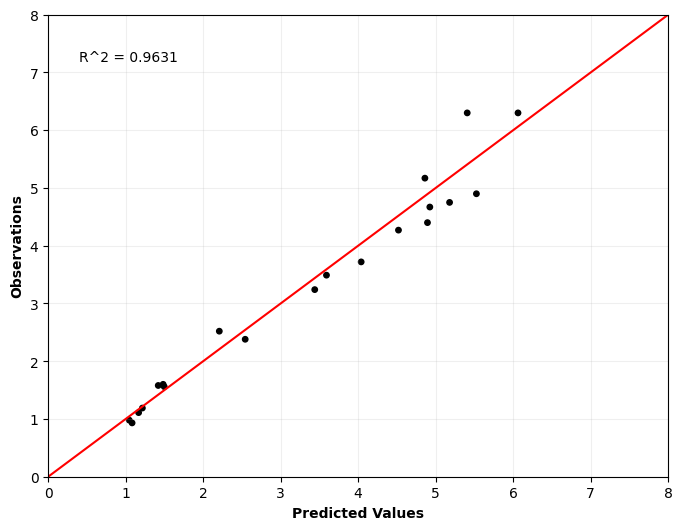

In [71]:
if dataset in ['freesolv', 'esol', 'lipo']:
    s = 25
elif dataset in ['vd']:
    s = 15

from matplotlib.colors import ListedColormap
pastel_cmap = ListedColormap(["black"])

plt.figure(figsize = (8, 6))

scatter = plt.scatter(df_test_MSE['pred'], df_test_MSE['target'],
                      c=df_test_MSE['target'], s = s,
                      cmap = pastel_cmap)

# 대각선 추가
min_val = min(df_test_MSE['target'].min(), df_test_MSE['pred'].min()) - 20
max_val = max(df_test_MSE['target'].max(), df_test_MSE['pred'].max()) + 20
plt.plot([min_val, max_val], [min_val, max_val], color='red')

if dataset == 'freesolv':
    plt.xlim(-15, 6)
    plt.ylim(-15, 6)
    plt.xticks(range(-15, 9, 3))
    plt.yticks(range(-15, 9, 3))
elif dataset == 'esol':
    plt.xlim(-10, 4)
    plt.ylim(-10, 4)
    plt.xticks(range(-10, 6, 2))
    plt.yticks(range(-10, 6, 2))
elif dataset == 'vd':
    plt.xlim(0, 8)
    plt.ylim(0, 8)
    plt.xticks(range(0, 9, 1))
    plt.yticks(range(0, 9, 1))
elif dataset == 'lipo':
    plt.xlim(-4, 8)
    plt.ylim(-4, 8)
    plt.xticks(range(-4, 10, 2))
    plt.yticks(range(-4, 10, 2))

plt.xlabel("Predicted Values", fontweight = 'bold')
plt.ylabel("Observations", fontweight = 'bold')

plt.text(0.05, 0.90, f'R^2 = {r2_mse:.4f}',
         transform = plt.gca().transAxes,
         fontsize = 10,)

plt.grid(alpha = 0.2)

# 저장
file_name = f'scatter_pred_mse_{dataset}.png'
file_path = os.path.join(save_dir, file_name)
print(file_path)
plt.savefig(file_path, dpi = 300, bbox_inches = 'tight')

plt.show()

# MAE

..\results_figure\scatter_pred_mae_vd.png


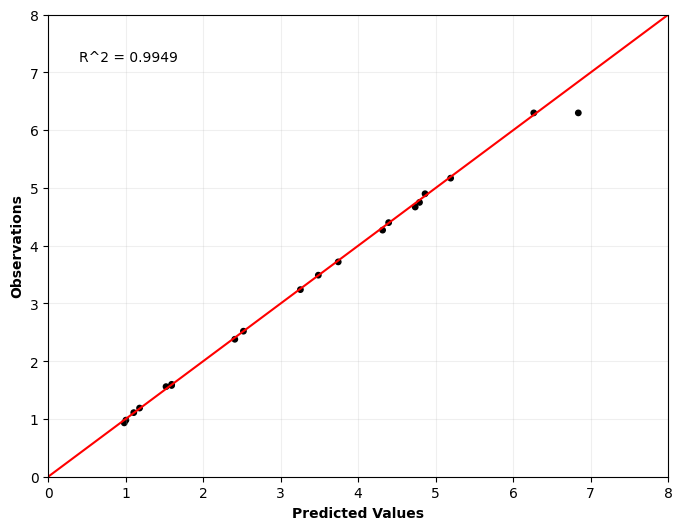

In [72]:
from matplotlib.colors import ListedColormap
pastel_cmap = ListedColormap(["black"])

plt.figure(figsize = (8, 6))

scatter = plt.scatter(df_test_MAE['pred'], df_test_MAE['target'],
                      c=df_test_MAE['target'], s = s,
                      cmap = pastel_cmap)

# 대각선 추가
min_val = min(df_test_MAE['target'].min(), df_test_MAE['pred'].min()) - 20
max_val = max(df_test_MAE['target'].max(), df_test_MAE['pred'].max()) + 20
plt.plot([min_val, max_val], [min_val, max_val], color='red')

if dataset == 'freesolv':
    plt.xlim(-15, 6)
    plt.ylim(-15, 6)
    plt.xticks(range(-15, 9, 3))
    plt.yticks(range(-15, 9, 3))
elif dataset == 'esol':
    plt.xlim(-10, 4)
    plt.ylim(-10, 4)
    plt.xticks(range(-10, 6, 2))
    plt.yticks(range(-10, 6, 2))
elif dataset == 'vd':
    plt.xlim(0, 8)
    plt.ylim(0, 8)
    plt.xticks(range(0, 9, 1))
    plt.yticks(range(0, 9, 1))
elif dataset == 'lipo':
    plt.xlim(-4, 8)
    plt.ylim(-4, 8)
    plt.xticks(range(-4, 10, 2))
    plt.yticks(range(-4, 10, 2))
    
plt.xlabel("Predicted Values", fontweight = 'bold')
plt.ylabel("Observations", fontweight = 'bold')

plt.text(0.05, 0.90, f'R^2 = {r2_mae:.4f}',
         transform = plt.gca().transAxes,
         fontsize = 10,)

plt.grid(alpha = 0.2)

# 저장
file_name = f'scatter_pred_mae_{dataset}.png'
file_path = os.path.join(save_dir, file_name)
print(file_path)
plt.savefig(file_path, dpi = 300, bbox_inches = 'tight')

plt.show()